Arbeidskrav 5, SOK-1005, Vår 2023

1) Skrap nettsiden og lagre resultatet en i dataramme.

In [217]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

';'.join(table[0])

def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('rekkevidde.csv',table)

df = pd.read_csv('rekkevidde.csv', delimiter=';', encoding='latin1')

df

,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


2) Vask dataen til en tabell med bare relevante tall og gode overskrifter. 

In [218]:
# Kolonnenavn
df.columns = ['Modell', 'WLTP', 'STOPP', 'Avvik']

# Split WLTP
df[['WLTP','kwh']] = df['WLTP'].str.split('/',expand=True)
# Fjern rader uten komplett data
df.drop(df[df['STOPP'] == 'x'].index, inplace = True)
# Reset index
df = df.reset_index(drop=True)

# Fjern km, kwh og endre , til .
df['WLTP'].replace(regex=True,inplace=True,to_replace=r' km',value=r'')
df['STOPP'].replace(regex=True,inplace=True,to_replace=r' km',value=r'')
df['kwh'].replace(regex=True,inplace=True,to_replace=r' kWh',value=r'')
df['kwh'].replace(regex=True,inplace=True,to_replace=r',',value=r'.')
df['Avvik'].replace(regex=True,inplace=True,to_replace=r' %',value=r'')
df['Avvik'].replace(regex=True,inplace=True,to_replace=r',',value=r'.')

# Endre datatype til int og float
df['WLTP'] = df['WLTP'].astype(int)
df['STOPP'] = df['STOPP'].astype(int)
df['kwh'] = df['kwh'].astype(float)
df['Avvik'] = df['Avvik'].astype(float)

#df.dtypes

df

,Modell,WLTP,STOPP,Avvik,kwh
0,Tesla Model 3 LR Dual motor,614,521,-15.15,14.7
1,Mercedes-Benz EQS 580 4matic,645,513,-20.47,18.3
2,BMW iX xDrive50,591,503,-14.89,21.4
3,Tesla Model Y LR Dual motor,507,451,-11.05,16.9
4,Volkswagen ID.3 PRO S,539,435,-19.29,16.3
5,Kia EV6 2WD,528,429,-18.75,16.5
6,NIO ES8 LR 7-seter,488,425,-12.91,21.5
7,Kia EV6 4WD,484,423,-12.60,18.0
8,Volkswagen ID.4 Pro,485,414,-14.64,18.4
9,Hyundai Ioniq 5 2WD,481,408,-15.18,16.8


3) Lag en regresjonsmodell av typen 𝑓(𝑥) = 𝑎𝑥 + 𝑏 der WLTP-km er uavhengig
variabel, og plott modellen mot leverandørens påståtte kjørelengde.

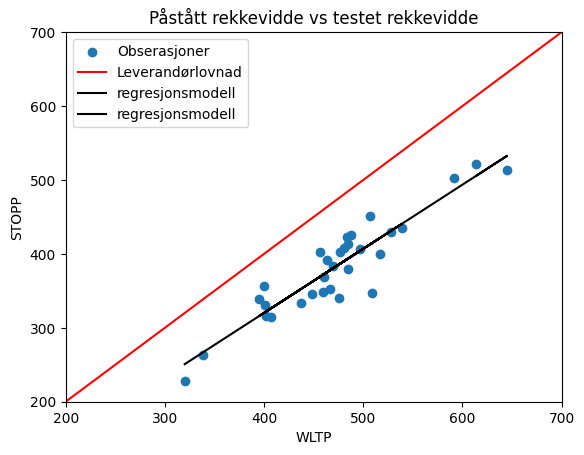

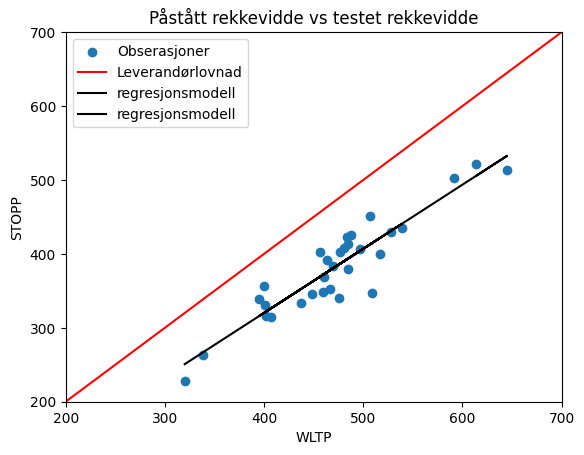

In [219]:
from matplotlib import pyplot as plt
from statsmodels.regression.linear_model import OLS

# Regresjonsmodell
y=df['STOPP']
x=pd.DataFrame((df['WLTP']))
x['intercept']=1

res=OLS(y,x).fit()

regression_line=res.params['intercept']+res.params['WLTP']*x

# Figur
fig,ax=plt.subplots()

# Plot limits
plt.xlim(200, 700)
plt.ylim(200, 700)

# Plot
ax.scatter(df['WLTP'],df['STOPP'], label='Obserasjoner')
ax.axline([0, 0], [700, 700], color='red', label='Leverandørlovnad')
ax.plot(x,regression_line, color='black', label='regresjonsmodell')

# Tittel og akser
plt.title('Påstått rekkevidde vs testet rekkevidde')

ax.set_xlabel('WLTP')
ax.set_ylabel('STOPP')

# Legende
ax.legend()

fig

Siste oppgave produserer to plot og to legende plasser for regresjonsmodell, og jeg aner ikke hvorfor.

Har naturlig nok brukt kode fra forelesningsnotatene, tidligere oppgaver, samt stackoverflow og andre nettsider for å løse oppgavene.